<a href="https://colab.research.google.com/github/dhruvg029/Text-Summarization-Using-Regex/blob/main/TextSummarizationUsingRegex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the main libraries for the dataset

import numpy as np
import pandas as pd

In [ ]:
# Read the files (or the dataset)

summary = pd.read_csv('/content/drive/MyDrive/news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('/content/drive/MyDrive/news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
# Copy the data from the original datasets raw and summary
pre1 =  raw.iloc[:,0:2].copy()
pre2 = summary.iloc[:,0:6].copy()

# Changes gone through the defines pre2 dataset
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

In [ ]:
# Created a DataFrame here with 2 columns => 'text' and 'summary'

pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [ ]:
pre.head(10)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."
5,Pakistani singer Rahat Fateh Ali Khan has deni...,Rahat Fateh Ali Khan denies getting notice for...
6,India recorded their lowest ODI total in New Z...,"India get all out for 92, their lowest ODI tot..."
7,Weeks after ex-CBI Director Alok Verma told th...,Govt directs Alok Verma to join work 1 day bef...
8,Andhra Pradesh CM N Chandrababu Naidu has said...,Called PM Modi 'sir' 10 times to satisfy his e...
9,Congress candidate Shafia Zubair won the Ramga...,"Cong wins Ramgarh bypoll in Rajasthan, takes t..."


**LSTM MODELLING**


In [ ]:
# print the first 10 rows of the 'text' column
pre['text'][:10]

0    Saurav Kant, an alumnus of upGrad and IIIT-B's...
1    Kunal Shah's credit card bill payment platform...
2    New Zealand defeated India by 8 wickets in the...
3    With Aegon Life iTerm Insurance plan, customer...
4    Speaking about the sexual harassment allegatio...
5    Pakistani singer Rahat Fateh Ali Khan has deni...
6    India recorded their lowest ODI total in New Z...
7    Weeks after ex-CBI Director Alok Verma told th...
8    Andhra Pradesh CM N Chandrababu Naidu has said...
9    Congress candidate Shafia Zubair won the Ramga...
Name: text, dtype: object

**DATA CLEANSING**


In [ ]:
# Import Regex Library
import re

# Removes non-alphabetic characters:
def text_strip(column):
    for row in column:

        # Remove escape charecters
        row = re.sub("(\\t)", ' ', str(row)).lower()
        row = re.sub("(\\r)", ' ', str(row)).lower()
        row = re.sub("(\\n)", ' ', str(row)).lower()

        # Remove _ if it occors more than one time consecutively
        row = re.sub("(__+)", ' ', str(row)).lower()

        # Remove - if it occors more than one time consecutively
        row = re.sub("(--+)", ' ', str(row)).lower()

        # Remove ~ if it occors more than one time consecutively
        row = re.sub("(~~+)", ' ', str(row)).lower()

        # Remove + if it occors more than one time consecutively
        row = re.sub("(\+\++)", ' ', str(row)).lower()

        # Remove . if it occors more than one time consecutively
        row = re.sub("(\.\.+)", ' ', str(row)).lower()

        # Remove <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower()

        # Remove mailto:
        row = re.sub("(mailto:)", ' ', str(row)).lower()

        # Remove full stop at end of words(not between)
        row = re.sub("(\.\s+)", ' ', str(row)).lower()

        # Remove - at end of words(not between)
        row = re.sub("(\-\s+)", ' ', str(row)).lower()

        # Remove : at end of words(not between)
        row = re.sub("(\:\s+)", ' ', str(row)).lower()

        # Remove any single charecters hanging between 2 spaces
        row = re.sub("(\s+.\s+)", ' ', str(row)).lower()

        # Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', repl_url, str(row))
        except:
            # There might be emails with no url in them
            pass

        # Remove multiple spaces
        row = re.sub("(\s+)",' ',str(row)).lower()

        # Should always be last
        # Remove any single charecters hanging between 2 spaces
        row = re.sub("(\s+.\s+)", ' ', str(row)).lower()

        yield row

In [ ]:
# Assigned the variables and then called the text_strip() function to remove the non alphabet characters
text_cleaning = text_strip(pre['text'])
summary_cleaning = text_strip(pre['summary'])

In [ ]:
# Import 'time' library to keep track of time
from time import time

# Import spacy, an NLP Toolkit for faster preprocessing and load the english language language 'en' and disabling the Named Entity Recognition in order to gain more speed
import spacy
nlp = spacy.load("en_core_web_sm")

t = time()

# Taking advantage of spaCy .pipe() method to speed-up the cleaning process
# Batch the data points into 5000 and run on all cores for faster preprocessing
# Cleaning takes an average of 6-7min
text = [str(doc) for doc in nlp.pipe(text_cleaning, batch_size=5000)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
t = time()

# Taking advantage of spaCy .pipe() method to speed-up the cleaning process
# Batch the data points into 5000 and run on all cores for faster preprocessing
# Cleaning takes an average of 1-2min
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(summary_cleaning, batch_size=5000, n_threads=-1)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.98 mins


In [ ]:
# First four rows of the 'text'
text[0:4]

['saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.',
 'kunal shah credit card bill payment platform cred gave users chance to win free food from swiggy for one year pranav kaushik delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cult.fit and more.',
 'new zealand defeated india by wickets in the fourth odi at hamilton on thursday to win their first match of the five-match odi series india lost an international match under rohit sharma captaincy after 12 consecutive victories dating back to march 2018 the match witnessed india getting all out for 

In [ ]:
# First four rows of the 'summary'
summary[0:4]

['_START_ upgrad learner switches to career in ml al with 90% salary hike _END_',
 '_START_ delhi techie wins free food from swiggy for one year on cred _END_',
 '_START_ new zealand end rohit sharma-led india 12-match winning streak _END_',
 '_START_ aegon life iterm insurance plan helps customers save tax _END_']

In [ ]:
# Created a Series object for the pre DataFrame
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

In [ ]:
# Creating two lists text_count and summary_count to store the 'text' and 'summary' values
text_count = []
summary_count = []

In [ ]:
# Adding and storing the values of the 'cleaned_text' and 'cleaned_summary' in the lists
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [ ]:
graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

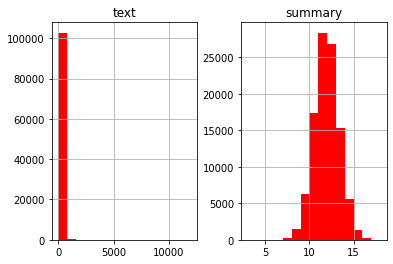

In [ ]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 15, color = 'red')
plt.show()

In [ ]:
# Check how much % of summary have less than 15 words
cnt = 0
for i in pre['cleaned_summary']:
    if(len(i.split()) <= 15):
        cnt = cnt + 1
print(cnt / len(pre['cleaned_summary']))

0.9978234465335472


In [ ]:
# Check how much % of text have less than 100 words
cnt = 0
for i in pre['cleaned_text']:
    if(len(i.split()) <= 100):
        cnt = cnt+1
print(cnt / len(pre['cleaned_text']))

0.9578389933440218


In [ ]:
# Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len = 100
max_summary_len = 15

In [ ]:
# Select the Summaries and Text between max len defined above
cleaned_text = np.array(pre['cleaned_text'])
cleaned_summary = np.array(pre['cleaned_summary'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df_2 = pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df_2.head(5)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma-led india...
3,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...


In [ ]:
# Add sostok and eostok just like _START_ and _END_
df_2['summary'] = df_2['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
df_2.head(2)

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok _START_ upgrad learner switches to care...
1,kunal shah credit card bill payment platform c...,sostok _START_ delhi techie wins free food fro...


**SEQ2SEQ MODEL BUILDING**

In [ ]:
# Using the train_test_split function for splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(df_2['text']), np.array(df_2['summary']), test_size = 0.1, random_state = 0, shuffle = True)

In [ ]:
# Lets tokenize the text to get the vocab count

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

In [ ]:
# tot_cnt gives the size of vocabulary (which means every unique words in the text)
# cnt gives me the no. of rare words whose count falls below threshold
# tot_cnt - cnt gives me the top most common words

thresh = 8

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    tot_freq = tot_freq + value
    if(value < thresh):
        cnt = cnt + 1
        freq = freq + value

print("% of rare words in vocabulary:", (cnt/tot_cnt)*100)
print("Total Coverage of rare words:", (freq/tot_freq)*100)

% of rare words in vocabulary: 57.91270391131826
Total Coverage of rare words: 1.3404923996005096


In [ ]:
x_tokenizer = Tokenizer(num_words = tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(x_train))

# convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_train_seq  = x_tokenizer.texts_to_sequences(x_train)
x_test_seq   = x_tokenizer.texts_to_sequences(x_test)

# padding zero upto maximum length
x_train =   pad_sequences(x_train_seq,  maxlen = max_text_len, padding='post')
x_test  =   pad_sequences(x_test_seq, maxlen = max_text_len, padding='post')

# size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 33412


In [ ]:
# prepare a tokenizer for reviews on training data

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

In [ ]:
# tot_cnt gives the size of vocabulary (which means every unique words in the text)
# cnt gives me the no. of rare words whose count falls below threshold
# tot_cnt - cnt gives me the top most common words

thresh = 6

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt+1
    tot_freq = tot_freq+value
    if(value < thresh):
        cnt = cnt+1
        freq = freq+value

print("% of rare words in vocabulary:", (cnt/tot_cnt)*100)
print("Total Coverage of rare words:", (freq/tot_freq)*100)

% of rare words in vocabulary: 66.34503603813067
Total Coverage of rare words: 3.566630093901333


In [ ]:
# Prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words = tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_train_seq  =   y_tokenizer.texts_to_sequences(y_train)
y_test_seq   =   y_tokenizer.texts_to_sequences(y_test)

# Padding zero upto maximum length
y_train =   pad_sequences(y_train_seq, maxlen = max_summary_len, padding='post')
y_test  =   pad_sequences(y_test_seq, maxlen = max_summary_len, padding='post')

# Size of vocabulary
y_voc  =   y_tokenizer.num_words + 1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 11581


In [ ]:
# We will now remove 'Summary' i.e Y (both train and test) which has only *START* and *END*

ind = []
for i in range(len(y_train)):
    cnt = 0
    for j in y_train[i]:
        if j != 0:
            cnt = cnt + 1
    if(cnt == 2):
        ind.append(i)

y_train = np.delete(y_train, ind, axis = 0)
x_train = np.delete(x_train, ind, axis = 0)

In [ ]:
# We will now remove 'Summary' i.e Y (both train and test) which has only *START* and *END*

ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_test[i]:
        if j!=0:
            cnt = cnt+1
    if(cnt==2):
        ind.append(i)

y_test = np.delete(y_test, ind, axis=0)
x_test = np.delete(x_test, ind, axis=0)

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from nltk.corpus import stopwords
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K
import gensim
import numpy as np
import pandas as pd
import warnings
import re

In [ ]:
pd.set_option("display.max_colwidth", 200)

warnings.filterwarnings("ignore")
K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# dense layer
# Time Distributed wrapper allows to apply a layer to every temporal slice of an input.
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     6682400     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
# Model is complied with the optimizer and the necessary loss function
model.compile(optimizer = 'rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history = model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] , epochs=50, callbacks=[es], batch_size=128, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

In [ ]:
# Plotting a curve between the training loss and validation loss

from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
# We are defining a function below which is the implementation of the inference process
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' ' +sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
# Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews

def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")